In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point



import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

## PMIP3 30&50N MH/PI AMOC scatter plot

In [2]:
filename_1='CCSM4_midHolocene.cvdp_data.1000-1300.nc'
ccsm=xr.open_dataset(filename_1,decode_times=False)

filename_2='CCSM4_piControl.cvdp_data.250-1300.nc'
pi_ccsm=xr.open_dataset(filename_2,decode_times=False)

filename_7='FGOALS-g2_midHolocene.cvdp_data.340-1019.nc'
fgoalsg2=xr.open_dataset(filename_7,decode_times=False)

filename_8='FGOALS-g2_piControl.cvdp_data.201-900.nc'
pi_fgoalsg2=xr.open_dataset(filename_8,decode_times=False)

filename_25='MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc'
mpip=xr.open_dataset(filename_25,decode_times=False)

filename_26='MPI-ESM-P_piControl.cvdp_data.1850-3005.nc'
pi_mpip=xr.open_dataset(filename_26,decode_times=False)


filename_27='MRI-CGCM3_midHolocene.cvdp_data.1951-2050.nc'
mri3=xr.open_dataset(filename_27,decode_times=False)

filename_28='MRI-CGCM3_piControl.cvdp_data.1851-2350.nc'
pi_mri3=xr.open_dataset(filename_28,decode_times=False)


In [3]:
ccsm_amoc_mean=ccsm.amoc_mean_ann
pi_ccsm_amoc_mean=pi_ccsm.amoc_mean_ann

fgoalsg2_amoc_mean=fgoalsg2.amoc_mean_ann
pi_fgoalsg2_amoc_mean=pi_fgoalsg2.amoc_mean_ann

mpip_amoc_mean=mpip.amoc_mean_ann
pi_mpip_amoc_mean=pi_mpip.amoc_mean_ann

mri3_amoc_mean=mri3.amoc_mean_ann
pi_mri3_amoc_mean=pi_mri3.amoc_mean_ann

In [4]:
amoc_mean=[ccsm_amoc_mean, fgoalsg2_amoc_mean, mpip_amoc_mean, mri3_amoc_mean]

In [5]:
pi_amoc_mean=[pi_ccsm_amoc_mean, pi_fgoalsg2_amoc_mean, pi_mpip_amoc_mean, pi_mri3_amoc_mean]

In [6]:
pmip3_modelname=['ccsm','fgoalsg2','mpip','mri3']

In [7]:
for n in range (0,len(pmip3_modelname)):
    globals()[pmip3_modelname[n]+'_lat30_amoc']=amoc_mean[n].sel(lat_amoc=30,method='nearest')

In [8]:
for n in range (0,len(pmip3_modelname)):
    globals()[pmip3_modelname[n]+'_lat50_amoc']=amoc_mean[n].sel(lat_amoc=50,method='nearest')

In [9]:
for n in range (0,len(pmip3_modelname)):
    globals()['pi_'+ pmip3_modelname[n]+'_lat30_amoc']=pi_amoc_mean[n].sel(lat_amoc=30,method='nearest')

In [10]:
for n in range (0,len(pmip3_modelname)):
    globals()['pi_'+ pmip3_modelname[n]+'_lat50_amoc']=pi_amoc_mean[n].sel(lat_amoc=50,method='nearest')

In [11]:
for u in range (0,len(pmip3_modelname)):
    globals()['max_'+ pmip3_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[pmip3_modelname[u]+'_lat30_amoc'])

In [12]:
for u in range (0,len(pmip3_modelname)):
    globals()['max_'+ pmip3_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[pmip3_modelname[u]+'_lat50_amoc'])

In [13]:
for u in range (0,len(pmip3_modelname)):
    globals()['pi_max_'+ pmip3_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ pmip3_modelname[u]+'_lat30_amoc'])

In [14]:
for u in range (0,len(pmip3_modelname)):
    globals()['pi_max_'+ pmip3_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ pmip3_modelname[u]+'_lat50_amoc'])

In [15]:
# print out the MH max AMOC st 30N
amoc_mh_30=[]
for n in range (0,len(pmip3_modelname)):
    amoc_mh_30.append(globals()['max_'+ pmip3_modelname[n]+'_lat30_amoc'])
print(amoc_mh_30)

[20.233278, 22.7345, 20.000252, 15.517204]


In [16]:
# print out the pi max AMOC st 30N
amoc_pi_30=[]
for n in range (0,len(pmip3_modelname)):
    amoc_pi_30.append(globals()['pi_max_'+ pmip3_modelname[n]+'_lat30_amoc'])
print(amoc_pi_30)

[20.486813, 23.108734, 19.40197, 14.64762]


In [17]:
# calculate the change of the maximum AMOC at 30N (MH - PI) 
amoc_30_diff=[]
for u in range (0,len(pmip3_modelname)):
    amoc_30_diff.append(globals()['max_'+ pmip3_modelname[u]+'_lat30_amoc'] - globals()['pi_max_'+ pmip3_modelname[u]+'_lat30_amoc'])
print(amoc_30_diff)

# 'ccsm','fgoalsg2','mpip','mri3'

[-0.25353432, -0.37423325, 0.59828186, 0.8695841]


In [18]:
# print out the MH max AMOC st 50N
amoc_mh_50=[]
for n in range (0,len(pmip3_modelname)):
    amoc_mh_50.append(globals()['max_'+ pmip3_modelname[n]+'_lat50_amoc'])
print(amoc_mh_50)

[15.773216, 18.024992, 16.358164, 14.559904]


In [19]:
# print out the pi max AMOC st 50N
amoc_pi_50=[]
for n in range (0,len(pmip3_modelname)):
    amoc_pi_50.append(globals()['pi_max_'+ pmip3_modelname[n]+'_lat50_amoc'])
print(amoc_pi_50)

[16.254234, 18.318829, 16.17277, 13.765188]


In [20]:
# calculate the change of the maximum AMOC at 50N (MH - PI) 
amoc_50_diff=[]
for u in range (0,len(pmip3_modelname)):
    amoc_50_diff.append(globals()['max_'+ pmip3_modelname[u]+'_lat50_amoc'] - globals()['pi_max_'+ pmip3_modelname[u]+'_lat50_amoc'])
print(amoc_50_diff)

# 'ccsm','fgoalsg2','mpip','mri3'

[-0.48101807, -0.2938366, 0.18539429, 0.7947159]


## PMIP4 30&50N MH/PI AMOC scatter plot

In [21]:
filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)

filename_31='FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_31,decode_times=False)

filename_32='FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'
pi_fgoalsf3=xr.open_dataset(filename_32,decode_times=False)

filename_11='GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_15='INM-CM4-8_midHolocene.cvdp_data.1880-2079.nc'
inm=xr.open_dataset(filename_15,decode_times=False)

filename_16='INM-CM4-8_piControl.cvdp_data.1850-2380.nc'
pi_inm=xr.open_dataset(filename_16,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)

filename_21='MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc'
mpi2=xr.open_dataset(filename_21,decode_times=False)

filename_22='MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc'
pi_mpi2=xr.open_dataset(filename_22,decode_times=False)

filename_23='MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc'
mri=xr.open_dataset(filename_23,decode_times=False)

filename_24='MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc'
pi_mri=xr.open_dataset(filename_24,decode_times=False)

filename_29='NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)


In [22]:
# add the fgoalsg3 model
filename_66='../../../Desktop/esgf_data_folder/streamfunction/mh_fgoalsg3_combined.nc'
fgoalsg3=xr.open_dataset(filename_66,decode_times=False)

filename_64='../../../Desktop/esgf_data_folder/streamfunction/pi_fgoalsg3_combined.nc'
pi_fgoalsg3=xr.open_dataset(filename_64,decode_times=False)

In [23]:
cesm_amoc_mean=cesm.amoc_mean_ann
pi_cesm_amoc_mean=pi_cesm.amoc_mean_ann

ec_amoc_mean=ec.amoc_mean_ann
pi_ec_amoc_mean=pi_ec.amoc_mean_ann

fgoalsf3_amoc_mean=fgoalsf3.amoc_mean_ann
pi_fgoalsf3_amoc_mean=pi_fgoalsf3.amoc_mean_ann

giss_amoc_mean=giss.amoc_mean_ann
pi_giss_amoc_mean=pi_giss.amoc_mean_ann

hadgem_amoc_mean=hadgem.amoc_mean_ann
pi_hadgem_amoc_mean=pi_hadgem.amoc_mean_ann

inm_amoc_mean=inm.amoc_mean_ann
pi_inm_amoc_mean=pi_inm.amoc_mean_ann

ipsl_amoc_mean=ipsl.amoc_mean_ann
pi_ipsl_amoc_mean=pi_ipsl.amoc_mean_ann

mpi2_amoc_mean=mpi2.amoc_mean_ann
pi_mpi2_amoc_mean=pi_mpi2.amoc_mean_ann

mri_amoc_mean=mri.amoc_mean_ann
pi_mri_amoc_mean=pi_mri.amoc_mean_ann

noresm2_amoc_mean=noresm2.amoc_mean_ann
pi_noresm2_amoc_mean=pi_noresm2.amoc_mean_ann


In [24]:
fgoalsg3_1=fgoalsg3.sel(basin=0)
fgoalsg3_2=fgoalsg3_1.mean(dim='time')
fgoalsg3_amoc_mean=fgoalsg3_2.msftmz

pi_fgoalsg3_1=pi_fgoalsg3.sel(basin=0)
pi_fgoalsg3_2=pi_fgoalsg3_1.mean(dim='time')
pi_fgoalsg3_amoc_mean=pi_fgoalsg3_2.msftmz

In [25]:
amoc_mean_4=[cesm_amoc_mean, ec_amoc_mean, fgoalsf3_amoc_mean, fgoalsg3_amoc_mean, 
             giss_amoc_mean, hadgem_amoc_mean, inm_amoc_mean, ipsl_amoc_mean, 
             mpi2_amoc_mean, mri_amoc_mean, noresm2_amoc_mean]

In [26]:
pi_amoc_mean_4=[pi_cesm_amoc_mean, pi_ec_amoc_mean, pi_fgoalsf3_amoc_mean, pi_fgoalsg3_amoc_mean,
                pi_giss_amoc_mean, pi_hadgem_amoc_mean, pi_inm_amoc_mean, pi_ipsl_amoc_mean, 
                pi_mpi2_amoc_mean, pi_mri_amoc_mean, pi_noresm2_amoc_mean]

In [27]:
pmip4_modelname=['cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2']

In [28]:
for n in (0,1,2,4,5,6,7,8,9,10):  #except for fgoalsg3
    globals()[pmip4_modelname[n]+'_lat30_amoc']=amoc_mean_4[n].sel(lat_amoc=30,method='nearest')

In [29]:
for n in (0,1,2,4,5,6,7,8,9,10):
    globals()[pmip4_modelname[n]+'_lat50_amoc']=amoc_mean_4[n].sel(lat_amoc=50,method='nearest')

In [30]:
for n in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_'+ pmip4_modelname[n]+'_lat30_amoc']=pi_amoc_mean_4[n].sel(lat_amoc=30,method='nearest')

In [31]:
for n in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_'+ pmip4_modelname[n]+'_lat50_amoc']=pi_amoc_mean_4[n].sel(lat_amoc=50,method='nearest')

In [32]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat30_amoc'])

In [33]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat50_amoc'])

In [34]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat30_amoc'])

In [35]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat50_amoc'])

In [36]:
for t in range (3,4): #for fgoalsg3
    globals()[pmip4_modelname[t]+'_lat30_amoc']=amoc_mean_4[t].sel(lat=30,method='nearest')

In [37]:
for t in range (3,4): #for fgoalsg3
    globals()[pmip4_modelname[t]+'_lat50_amoc']=amoc_mean_4[t].sel(lat=50,method='nearest')

In [38]:
for t in range (3,4):
    globals()['pi_'+ pmip4_modelname[t]+'_lat30_amoc']=pi_amoc_mean_4[t].sel(lat=30,method='nearest')

In [39]:
for t in range (3,4):
    globals()['pi_'+ pmip4_modelname[t]+'_lat50_amoc']=pi_amoc_mean_4[t].sel(lat=50,method='nearest')

In [40]:
for u in range (3,4):
    globals()['max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat30_amoc'])

In [41]:
for u in range (3,4):
    globals()['max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat50_amoc'])

In [42]:
for u in range (3,4):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat30_amoc'])

In [43]:
for u in range (3,4):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat50_amoc'])

## calculate the max AMOC at 30/50N for mh/pi

In [44]:
# print out the MH max AMOC st 30N
amoc_mh_30=[]

for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_mh_30.append(globals()['max_'+ pmip4_modelname[n]+'_lat30_amoc'])
    else:
        amoc_mh_30.append(globals()['max_'+ pmip4_modelname[n]+'_lat30_amoc'] * 1e-9) # convert the units from kg/s to Sv

# print out the value with 6 decimal places        
Amoc_mh_30=[round(num, 6) for num in amoc_mh_30]
print(Amoc_mh_30)

# 'cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2'

[19.411755, 16.239342, 24.429445, 33.466239, 24.501793, 18.355944, 16.329693, 11.590652, 20.06861, 20.248077, 21.449335]


In [45]:
# print out the pi max AMOC st 30N
amoc_pi_30=[]
for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_pi_30.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat30_amoc'])
    else:
        amoc_pi_30.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat30_amoc'] * 1e-9)

Amoc_pi_30=[round(num, 6) for num in amoc_pi_30]
print(Amoc_pi_30)

[19.105024, 14.982977, 23.945753, 32.806423, 24.397606, 16.976843, 17.056538, 12.129082, 20.06891, 18.007044, 21.176233]


In [46]:
# calculate the change of the maximum AMOC at 30N (MH - PI) 
amoc_30_diff=[] 
for n in range (0, len(pmip4_modelname)):
    amoc_30_diff.append (amoc_mh_30[n] - amoc_pi_30[n])

Amoc_30_diff = [round(num, 6) for num in amoc_30_diff]
print(Amoc_30_diff)

# 'cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2'

[0.30673, 1.256365, 0.483692, 0.659816, 0.104187, 1.379101, -0.726845, -0.53843, -0.000301, 2.241034, 0.273102]


In [47]:
# print out the MH max AMOC st 50N
amoc_mh_50=[]

for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_mh_50.append(globals()['max_'+ pmip4_modelname[n]+'_lat50_amoc'])
    else:
        amoc_mh_50.append(globals()['max_'+ pmip4_modelname[n]+'_lat50_amoc'] * 1e-9) # convert the units from kg/s to Sv

# print out the value with 6 decimal places        
Amoc_mh_50=[round(num, 6) for num in amoc_mh_50]
print(Amoc_mh_50)

[16.425135, 15.29902, 21.285234, 34.809016, 15.316298, 14.522717, 5.739996, 10.454684, 16.549305, 16.636135, 13.447311]


In [48]:
# print out the pi max AMOC st 50N
amoc_pi_50=[]
for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_pi_50.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat50_amoc'])
    else:
        amoc_pi_50.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat50_amoc'] * 1e-9)

Amoc_pi_50=[round(num, 6) for num in amoc_pi_50]
print(Amoc_pi_50)

[16.229677, 14.52121, 20.798315, 33.230043, 15.479198, 13.909647, 5.989632, 10.860806, 16.654346, 16.237524, 13.554823]


In [49]:
# calculate the change of the maximum AMOC at 50N (MH - PI) 
amoc_50_diff=[] 
for n in range (0, len(pmip4_modelname)):
    amoc_50_diff.append (amoc_mh_50[n] - amoc_pi_50[n])

Amoc_50_diff = [round(num, 6) for num in amoc_50_diff]
print(Amoc_50_diff)

# 'cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2'

[0.195457, 0.77781, 0.486918, 1.578973, -0.162899, 0.61307, -0.249636, -0.406121, -0.105042, 0.398611, -0.107512]


In [50]:
df= pd.read_csv('PMIP4_mh_modellist.csv',skipinitialspace=True,header=0)
df

,number,model,color,mhncl_R,mhncl_G,mhncl_B,ipccncl_r,ipccncl_g,ipccncl_b,mh_r,mh_g,mh_b,ipcc_r,ipcc_g,ipcc_b
0,1,AWI-ESM-1-1-LR,darkorange2,238,118,0,153.0,0.0,255.0,0.933333,0.462745,0.000000,0.600000,0.000000,1.000000
1,2,CESM2,darkturquoise,0,206,209,67.0,178.0,216.0,0.000000,0.807843,0.819608,0.262745,0.698039,0.847059
2,3,EC-Earth3-LR,deeppink2,238,18,137,124.0,99.0,184.0,0.933333,0.070588,0.537255,0.486275,0.388235,0.721569
3,4,FGOALS-f3-L,blue4,0,0,139,248.0,154.0,28.0,0.000000,0.000000,0.545098,0.972549,0.603922,0.109804
4,5,FGOALS-g3,lightblue1,191,239,255,248.0,154.0,28.0,0.749020,0.937255,1.000000,0.972549,0.603922,0.109804
5,6,GISS-E2-1-G,magenta4,139,0,139,119.0,29.0,123.0,0.545098,0.000000,0.545098,0.466667,0.113725,0.482353
6,7,HadGEM3-GC31-LL,green4,0,139,0,122.0,139.0,38.0,0.000000,0.545098,0.000000,0.478431,0.545098,0.149020
7,8,INM-CM4-8,firebrick,178,34,34,247.0,67.0,67.0,0.698039,0.133333,0.133333,0.968627,0.262745,0.262745
8,9,IPSL-CM6A-LR,chocolate4,139,69,19,91.0,83.0,174.0,0.545098,0.270588,0.074510,0.356863,0.325490,0.682353
9,10,MIROC-ES2L,purple,160,32,240,184.0,95.0,182.0,0.627451,0.125490,0.941176,0.721569,0.372549,0.713725


In [51]:
# select the model that I need 
import csv

DESIRED_ROWS = {2,3,4,5,6,7,8,9,11,12,15}
with open("PMIP4_mh_modellist.csv") as input_file:
    reader = csv.reader(input_file)

    desired_rows = [row for row_number, row in enumerate(reader)
                    if row_number in DESIRED_ROWS]

df_sel = pd.DataFrame(desired_rows,columns=['number','model','color','mhncl_R','mhncl_G','mhncl_B','ipccncl_r','ipccncl_g','ipccncl_b','mh_r','mh_g','mh_b','ipcc_r','ipcc_g','ipcc_b',])
df_sel

,number,model,color,mhncl_R,mhncl_G,mhncl_B,ipccncl_r,ipccncl_g,ipccncl_b,mh_r,mh_g,mh_b,ipcc_r,ipcc_g,ipcc_b
0,2,CESM2,darkturquoise,0,206,209,67,178,216,0,0.807843137,0.819607843,0.262745098,0.698039216,0.847058824
1,3,EC-Earth3-LR,deeppink2,238,18,137,124,99,184,0.933333333,0.070588235,0.537254902,0.48627451,0.388235294,0.721568627
2,4,FGOALS-f3-L,blue4,0,0,139,248,154,28,0,0,0.545098039,0.97254902,0.603921569,0.109803922
3,5,FGOALS-g3,lightblue1,191,239,255,248,154,28,0.749019608,0.937254902,1,0.97254902,0.603921569,0.109803922
4,6,GISS-E2-1-G,magenta4,139,0,139,119,29,123,0.545098039,0,0.545098039,0.466666667,0.11372549,0.482352941
5,7,HadGEM3-GC31-LL,green4,0,139,0,122,139,38,0,0.545098039,0,0.478431373,0.545098039,0.149019608
6,8,INM-CM4-8,firebrick,178,34,34,247,67,67,0.698039216,0.133333333,0.133333333,0.968627451,0.262745098,0.262745098
7,9,IPSL-CM6A-LR,chocolate4,139,69,19,91,83,174,0.545098039,0.270588235,0.074509804,0.356862745,0.325490196,0.682352941
8,11,MPI-ESM1-2-LR,brown4,139,35,35,93,161,162,0.545098039,0.137254902,0.137254902,0.364705882,0.631372549,0.635294118
9,12,MRI-ESM2-0,darkseagreen4,105,139,105,173,255,47,0.411764706,0.545098039,0.411764706,0.678431373,1,0.184313725


In [69]:
#save the selected model info to a new CSV file 
# in order to use the new file for colour info
df_sel.to_csv('PMIP4_mh_mymodel.csv')

In [50]:
pmip4_model_name=['CESM2','EC-Earth3-LR','FGOALS-f3-L','FGOALS-g3',
                  'GISS-E2-1-G','HadGEM3-GC31-LL',
                  'INM-CM4-8','IPSL-CM6A-LR','MPI-ESM1-2-LR','MRI-ESM2-0',
                  'NorESM2-LM']

In [51]:
pmip4_r=pd.read_csv('PMIP4_mh_mymodel.csv',skipinitialspace=True,header=0)['ipcc_r']
pmip4_g=pd.read_csv('PMIP4_mh_mymodel.csv',skipinitialspace=True,header=0)['ipcc_g']
pmip4_b=pd.read_csv('PMIP4_mh_mymodel.csv',skipinitialspace=True,header=0)['ipcc_b']

In [52]:
pmip3_model_name=['CCSM4','FGOALS-G2','MPI-ESM-P','MRI-CGCM3']

In [53]:
pmip3_legend_color=['orangered','limegreen','violet','blue']

## plot PMIP3 & PMIP4 data on the same plot

[Text(0.5, 1.0, 'AMOC at $30\\degree$N & $50\\degree$N in simulations (MH and PI)')]

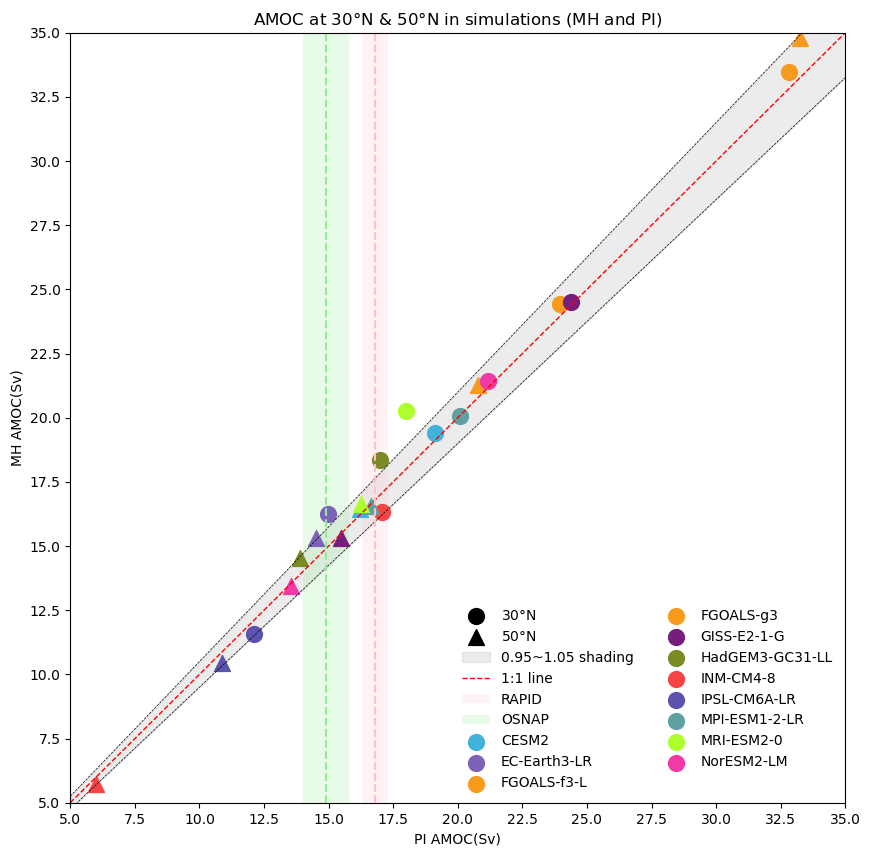

In [54]:
fig=plt.figure(figsize=(10,10)) 

ax=fig.add_subplot(111)


#ax.plot(0,0,color='k',marker='o',label='PMIP3-30N',fillstyle='none', mew=1.5, linestyle='None',markersize=10)
#ax.plot(0,0,color='k',marker='^',label='PMIP3-50N',fillstyle='none', mew=1.5, linestyle='None',markersize=10)
ax.scatter(0,0,color='k',marker='o',label='$30\degree$N', s=130)
ax.scatter(0,0,color='k',marker='^',label='$50\degree$N', s=130)

x=np.linspace(5,35,100)
y=x
ax.fill_between(x, 0.95*y, 1.05*y, color='grey', alpha=0.15, label='0.95~1.05 shading')
ax.plot(x,y,'--',linewidth=1, color='r',label='1:1 line')
ax.plot(x,0.95*y, '--',linewidth=0.5, color='black')
ax.plot(x,1.05*y, '--',linewidth=0.5, color='black')

#Y1=[5,5]
#Y2=[30,30]
#X1=[14,15.8]
#X2=[16.3,17.3]#overlap RAPID 16.8+/-0.5

X1=np.linspace(14,15.8,100) #OSNAP:14.9+/-0.9 Sv
X2=np.linspace(16.3,17.3,100) #overlap RAPID 16.8+/-0.5
Y1=5
Y2=35
ax.axvline(x=16.8,color='pink',linestyle="--",linewidth=1.5)
ax.fill_between(X2,Y1,Y2,facecolor='pink', alpha=0.2, label='RAPID') # define the range for x-axis, then define the range for y-axis (upper & bottom)
ax.axvline(x=14.9,color='lightgreen',linestyle="--",linewidth=1.5)
ax.fill_between(X1,Y1,Y2,facecolor='lightgreen', alpha=0.2, label='OSNAP')
    
    

#for k in range (0,len(pmip3_modelname)):
    #ax.plot(globals()['pi_max_'+ pmip3_modelname[k]+'_lat30_amoc'], globals()['max_'+ pmip3_modelname[k]+'_lat30_amoc'], label=pmip3_model_name[k], color=pmip3_legend_color[k], marker='o',fillstyle='none', mew=1.5, linestyle='None',markersize=10)
    #ax.plot(globals()['pi_max_'+ pmip3_modelname[k]+'_lat50_amoc'], globals()['max_'+ pmip3_modelname[k]+'_lat50_amoc'], color=pmip3_legend_color[k], marker='^',fillstyle='none', mew=1.5, linestyle='None', markersize=10)

for m in range (0,len(pmip4_modelname)):
    ax.scatter(amoc_pi_30[m], amoc_mh_30[m], label=pmip4_model_name[m], color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), marker='o', s=130)
    ax.scatter(amoc_pi_50[m], amoc_mh_50[m], color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), marker='^', s=130)

    

ax.set(xlabel='PI AMOC(Sv)',ylabel='MH AMOC(Sv)')
ax.set_xlim(5,35)
ax.set_ylim(5,35)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_major_locator(MultipleLocator(2.5))
ax.legend(loc='lower right',ncol=2, edgecolor='None',facecolor='None')
ax.set(title='AMOC at $30\degree$N & $50\degree$N in simulations (MH and PI)')

# max AMOC at 50N for fgoalsg3 =34.8 Sv

[Text(0.5, 1.0, 'AMOC at 30N & 50N in simulations (MH and PI)')]

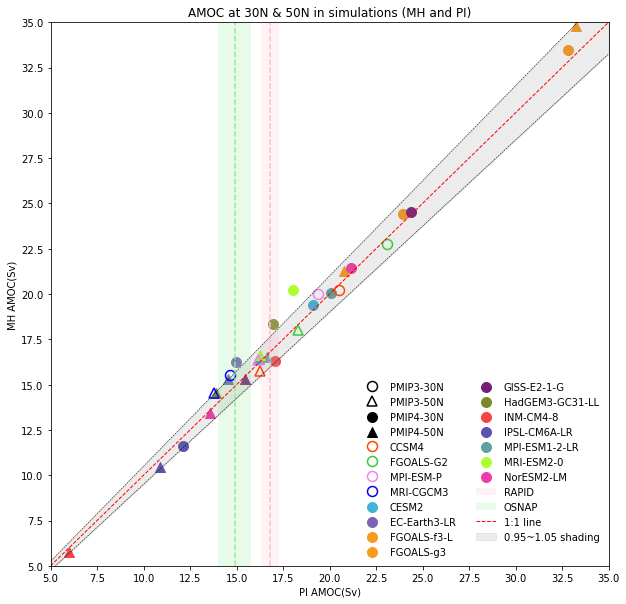

In [61]:
fig=plt.figure(figsize=(10,10)) 

ax=fig.add_subplot(111)

ax.plot(0,0,color='k',marker='o',label='PMIP3-30N',fillstyle='none', mew=1.5, linestyle='None',markersize=10)
ax.plot(0,0,color='k',marker='^',label='PMIP3-50N',fillstyle='none', mew=1.5, linestyle='None',markersize=10)
ax.scatter(0,0,color='k',marker='o',label='PMIP4-30N', s=100)
ax.scatter(0,0,color='k',marker='^',label='PMIP4-50N', s=100)
    

for k in range (0,len(pmip3_modelname)):
    ax.plot(globals()['pi_max_'+ pmip3_modelname[k]+'_lat30_amoc'], globals()['max_'+ pmip3_modelname[k]+'_lat30_amoc'], label=pmip3_model_name[k], color=pmip3_legend_color[k], marker='o',fillstyle='none', mew=1.5, linestyle='None',markersize=10)
    ax.plot(globals()['pi_max_'+ pmip3_modelname[k]+'_lat50_amoc'], globals()['max_'+ pmip3_modelname[k]+'_lat50_amoc'], color=pmip3_legend_color[k], marker='^',fillstyle='none', mew=1.5, linestyle='None', markersize=10)

for m in range (0,len(pmip4_modelname)):
    ax.scatter(amoc_pi_30[m], amoc_mh_30[m], label=pmip4_model_name[m], color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), marker='o', s=100)
    ax.scatter(amoc_pi_50[m], amoc_mh_50[m], color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), marker='^', s=100)

    
#Y1=[5,5]
#Y2=[30,30]
#X1=[14,15.8]
#X2=[16.3,17.3]#overlap RAPID 16.8+/-0.5

X1=np.linspace(14,15.8,100) #OSNAP:14.9+/-0.9 Sv
X2=np.linspace(16.3,17.3,100) #overlap RAPID 16.8+/-0.5
Y1=5
Y2=35
ax.axvline(x=16.8,color='pink',linestyle="--",linewidth=1.5)
ax.fill_between(X2,Y1,Y2,facecolor='pink', alpha=0.2, label='RAPID') # define the range for x-axis, then define the range for y-axis (upper & bottom)
ax.axvline(x=14.9,color='lightgreen',linestyle="--",linewidth=1.5)
ax.fill_between(X1,Y1,Y2,facecolor='lightgreen', alpha=0.2, label='OSNAP')
    
x=np.linspace(5,35,100)
y=x
ax.plot(x,y,'--',linewidth=1, color='r',label='1:1 line')
ax.plot(x,0.95*y, '--',linewidth=0.5, color='black')
ax.plot(x,1.05*y, '--',linewidth=0.5, color='black')
ax.fill_between(x, 0.95*y, 1.05*y, color='grey', alpha=0.15, label='0.95~1.05 shading')
ax.set(xlabel='PI AMOC(Sv)',ylabel='MH AMOC(Sv)')
ax.set_xlim(5,35)
ax.set_ylim(5,35)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_major_locator(MultipleLocator(2.5))
ax.legend(loc='lower right',ncol=2, edgecolor='None',facecolor='None')
ax.set(title='AMOC at $30\degree$ N & $50\degree$ N in simulations (MH and PI)')

# max AMOC at 50N for fgoalsg3 =34.8 Sv

In [72]:
ds_9= pd.read_excel('../../../Desktop/sic.xlsx','Sheet4')  
print(ds_9) 


        Model name*  MH maximum AMOC 30N (unit:Sv)  LIG maximum AMOC 30N  \
0     ACCESS-ESM1-5                            NaN                   NaN   
1             CESM2                         19.412                19.919   
2      EC-Earth3-LR                         16.239                18.553   
3       FGOALS-f3-L                         24.429                25.208   
4         FGOALS-g3                         33.466                33.388   
5       GISS-E2-1-G                         24.502                25.038   
6   HadGEM3-GC31-LL                         18.356                18.099   
7         INM-CM4-8                         16.330                   NaN   
8      IPSL-CM6A-LR                         11.591                10.287   
9     MPI-ESM1-2-LR                         20.069                   NaN   
10       MRI-ESM2-0                         20.248                   NaN   
11       NorESM2-LM                         21.449                21.562   
12    ACCESS

In [73]:
mh_std=ds_9.loc[0:11,'MH std (anuual mean AMOC 30N)']
print(mh_std)

0       NaN
1     0.825
2     2.740
3     2.176
4     1.896
5     1.595
6     1.216
7     1.141
8     1.271
9     1.408
10    1.377
11    0.778
Name: MH std (anuual mean AMOC 30N), dtype: float64


In [74]:
pi_std=ds_9.loc[0:11,'PI std (anuual mean AMOC 30N )']
print(pi_std)

0       NaN
1     0.824
2     2.059
3     2.740
4     2.528
5     1.991
6     1.226
7     1.320
8     1.273
9     1.228
10    1.043
11    0.868
Name: PI std (anuual mean AMOC 30N ), dtype: float64


In [75]:
mh_per_change=ds_9.loc[0:11,'% of change (wrt PI)']
print(mh_per_change)

0      NaN
1      1.6
2      8.4
3      2.0
4      2.0
5      0.4
6      8.1
7     -4.3
8     -4.4
9      0.0
10    12.4
11     1.3
Name: % of change (wrt PI), dtype: float64


In [76]:
mh_sv_change=ds_9.loc[0:11,'(MH-PI) change Sv'] 
print(mh_sv_change)

0       NaN
1     0.307
2     1.256
3     0.483
4     0.660
5     0.104
6     1.379
7    -0.727
8    -0.538
9     0.000
10    2.241
11    0.273
Name: (MH-PI) change Sv, dtype: float64


In [59]:
#Generate plotting positions 
p1=[0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3]
p2=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
p3=[0.7,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,9.7,10.7]
#Generate ref. lines
xlines=[1,2,3,4,5,6,7,8,9,10,11]
ylines=[14.9,16.8]

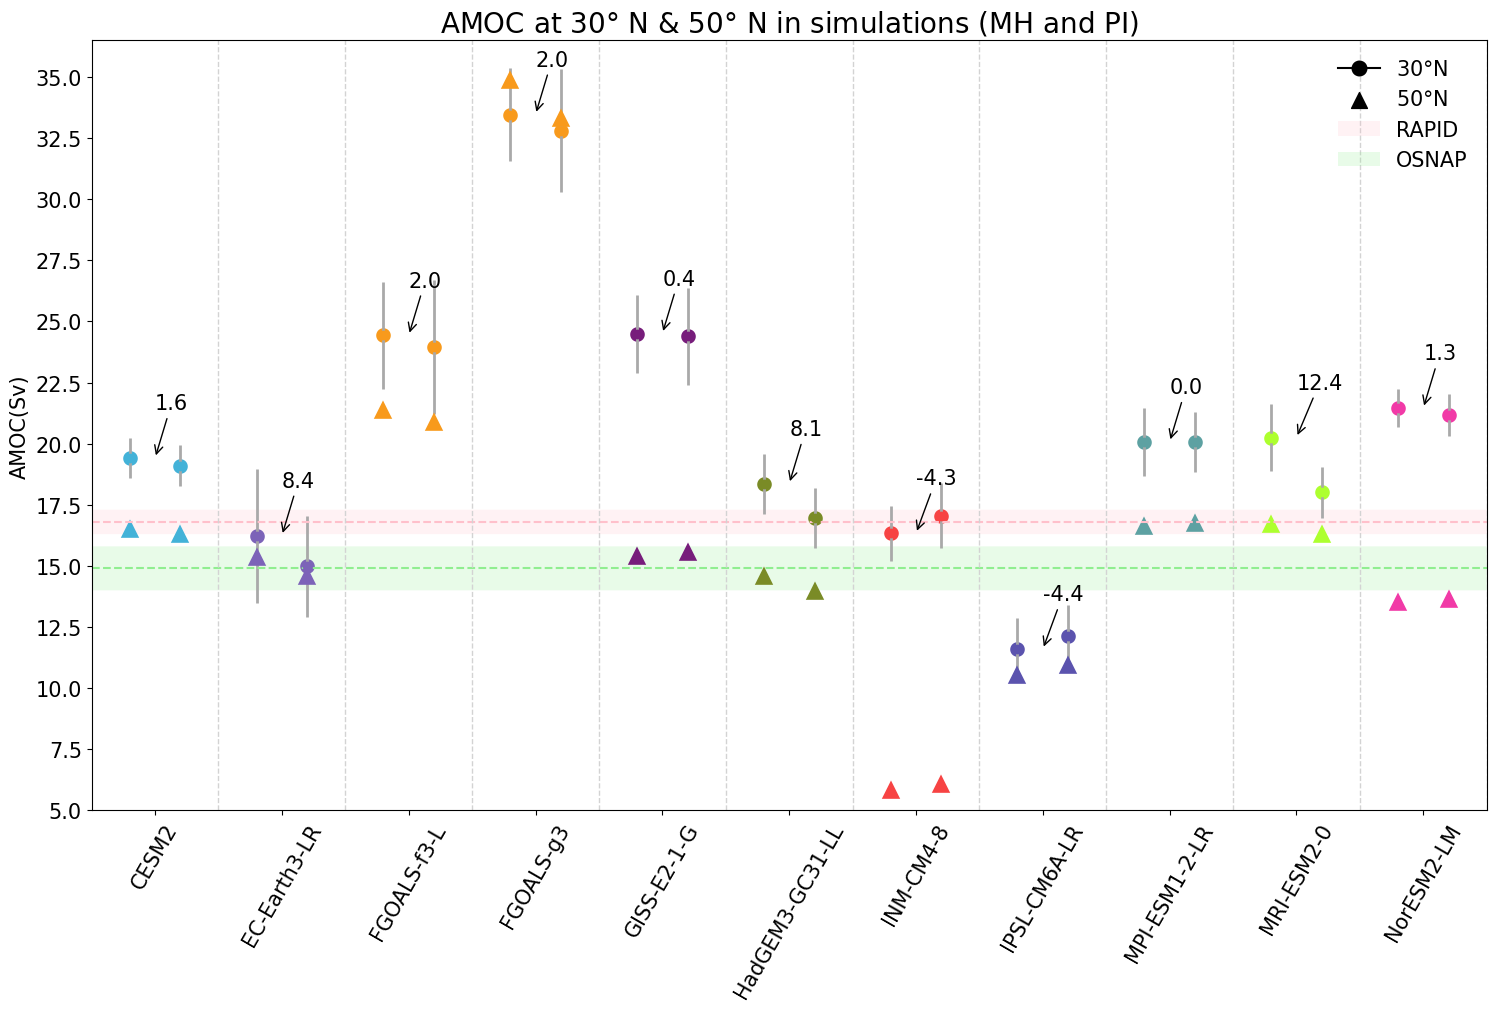

In [60]:
fig=plt.figure(figsize=(18,10)) 
ax=fig.add_subplot(111)
#plt.figure(figsize=(18,10))
plt.ylim((5,36.5))
plt.xlim((0,11))
plt.xticks(size = 15)
plt.yticks(size = 15)

ax.plot(0,0,color='k',marker='o',label='$30\degree$N',mew=5.5)
ax.scatter(0,0,color='k',marker='^',label='$50\degree$N',s=130)

for m in range (0,len(pmip4_modelname)):
    plt.plot(p1[m],amoc_mh_30[m],marker='o', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]),fillstyle='full',mew=5.5, ms=5,linestyle='None')
    plt.plot(p3[m],amoc_pi_30[m],marker='o', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]),fillstyle='full',mew=5.5, ms=5,linestyle='None')
    mh_yerr = mh_std[:] 
    pi_yerr = pi_std[:]
    plt.errorbar(p1[m], amoc_mh_30[m], yerr=mh_yerr[m], fmt='o', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), ecolor='darkgray', elinewidth=2, capsize=0) 
    plt.errorbar(p3[m], amoc_pi_30[m], yerr=pi_yerr[m], fmt='o', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), ecolor='darkgray', elinewidth=2, capsize=0) 
    
    
    
    
    plt.plot(p1[m],amoc_mh_50[m],marker='^', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]),fillstyle='full',mew=5.5, ms=5,linestyle='None')
    plt.plot(p3[m],amoc_pi_50[m],marker='^', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]),fillstyle='full',mew=5.5, ms=5,linestyle='None')
    
    
    plt.annotate('%s'%(mh_per_change[m]), xy=(p2[m],amoc_mh_30[m]),xytext=(p2[m],amoc_mh_30[m]+2),
                                        arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15)

    
plt.xticks(p2,pmip4_model_name,fontsize=15,rotation=60)


X = np.linspace(0, 11, 1000)
Y1 = 0*X+16.3 #overlap RAPID 16.8+/-0.5
Y2 = 0*X+17.3

Y3 = 0*X+14 #OSNAP:14.9+/-0.9 Sv
Y4 = 0*X+15.8
    
plt.axhline(y=16.8,color='pink',linestyle="--",linewidth=1.5)
plt.fill_between(X,Y1,Y2,facecolor='pink', alpha=0.2, label='RAPID') # define the range for x-axis, then define the range for y-axis (upper & bottom)
plt.axhline(y=14.9,color='lightgreen',linestyle="--",linewidth=1.5)
plt.fill_between(X,Y3,Y4,facecolor='lightgreen', alpha=0.2, label='OSNAP')

leg=plt.legend(edgecolor='None',facecolor='None',fontsize=15,loc='upper right')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
for xi in xlines:
    plt.axvline(xi,color='lightgrey',linestyle="--",linewidth=1)
    
plt.title('AMOC at $30\degree$ N & $50\degree$ N in simulations (MH and PI)',fontsize=20)
plt.ylabel('AMOC(Sv)',fontsize=15)
ax.yaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(2.5))

# for each model: left is MH amoc, right is PI amoc
# circle is 30N amoc (with error bars - 1std) , triangle is 50N amoc (without error bar)
# the percentage of AMOC changes at 30N (w.r.t PI amoc) is annotated -- (+)values means MH amoc > PI amoc
#                                                                   (-)values means MH amoc < PI amoc

In [77]:
ds_19= pd.read_excel('../../../Desktop/sic.xlsx','Sheet5')  
print(ds_19)

        Model name*  LIG maximum AMOC 30N  PI maximum AMOC 30N  \
0     ACCESS-ESM1-5                22.523               19.516   
1             CESM2                19.919               19.105   
2      EC-Earth3-LR                18.553               14.983   
3       FGOALS-f3-L                25.208               23.946   
4         FGOALS-g3                33.388               32.806   
5       GISS-E2-1-G                25.038               24.398   
6   HadGEM3-GC31-LL                18.099               16.977   
7         INM-CM4-8                   NaN                  NaN   
8      IPSL-CM6A-LR                10.287               12.129   
9     MPI-ESM1-2-LR                   NaN                  NaN   
10       MRI-ESM2-0                   NaN                  NaN   
11       NorESM2-LM                21.562               21.176   

    LIG std (annual mean AMOC 30N)  PI std (anuual mean AMOC 30N )  \
0                            1.556                           1.083   
1

In [101]:
lig_std=ds_19.loc[0:11,'LIG std (annual mean AMOC 30N)']
print(lig_std)

0     1.556
1     0.729
2     1.382
3     2.086
4     2.068
5     1.773
6     1.052
7       NaN
8     1.291
9       NaN
10      NaN
11    0.794
Name: LIG std (annual mean AMOC 30N), dtype: float64


In [102]:
lig_per_change=ds_19.loc[0:11,'% of change (wrt PI)']
print(lig_per_change)

0     15.4
1      4.3
2     23.8
3      5.3
4      1.8
5      2.6
6      6.6
7      NaN
8    -15.2
9      NaN
10     NaN
11     1.8
Name: % of change (wrt PI), dtype: float64


In [103]:
lig_sv_change=ds_19.loc[0:11,'(LIG-PI) change Sv'] 
print(lig_sv_change)

0     3.007
1     0.814
2     3.570
3     1.262
4     0.582
5     0.640
6     1.122
7       NaN
8    -1.842
9       NaN
10      NaN
11    0.386
Name: (LIG-PI) change Sv, dtype: float64


In [81]:
# get the color for ACCESS model
lig_pmip4_r=pd.read_csv('PMIP4_lig127k_mymodel.csv',skipinitialspace=True,header=0)['ipcc_r']
lig_pmip4_g=pd.read_csv('PMIP4_lig127k_mymodel.csv',skipinitialspace=True,header=0)['ipcc_g']
lig_pmip4_b=pd.read_csv('PMIP4_lig127k_mymodel.csv',skipinitialspace=True,header=0)['ipcc_b']

In [82]:
all_model_name=['ACCESS-ESM1-5','CESM2','EC-Earth3-LR','FGOALS-f3-L','FGOALS-g3',
                  'GISS-E2-1-G','HadGEM3-GC31-LL',
                  'INM-CM4-8','IPSL-CM6A-LR','MPI-ESM1-2-LR','MRI-ESM2-0',
                  'NorESM2-LM']

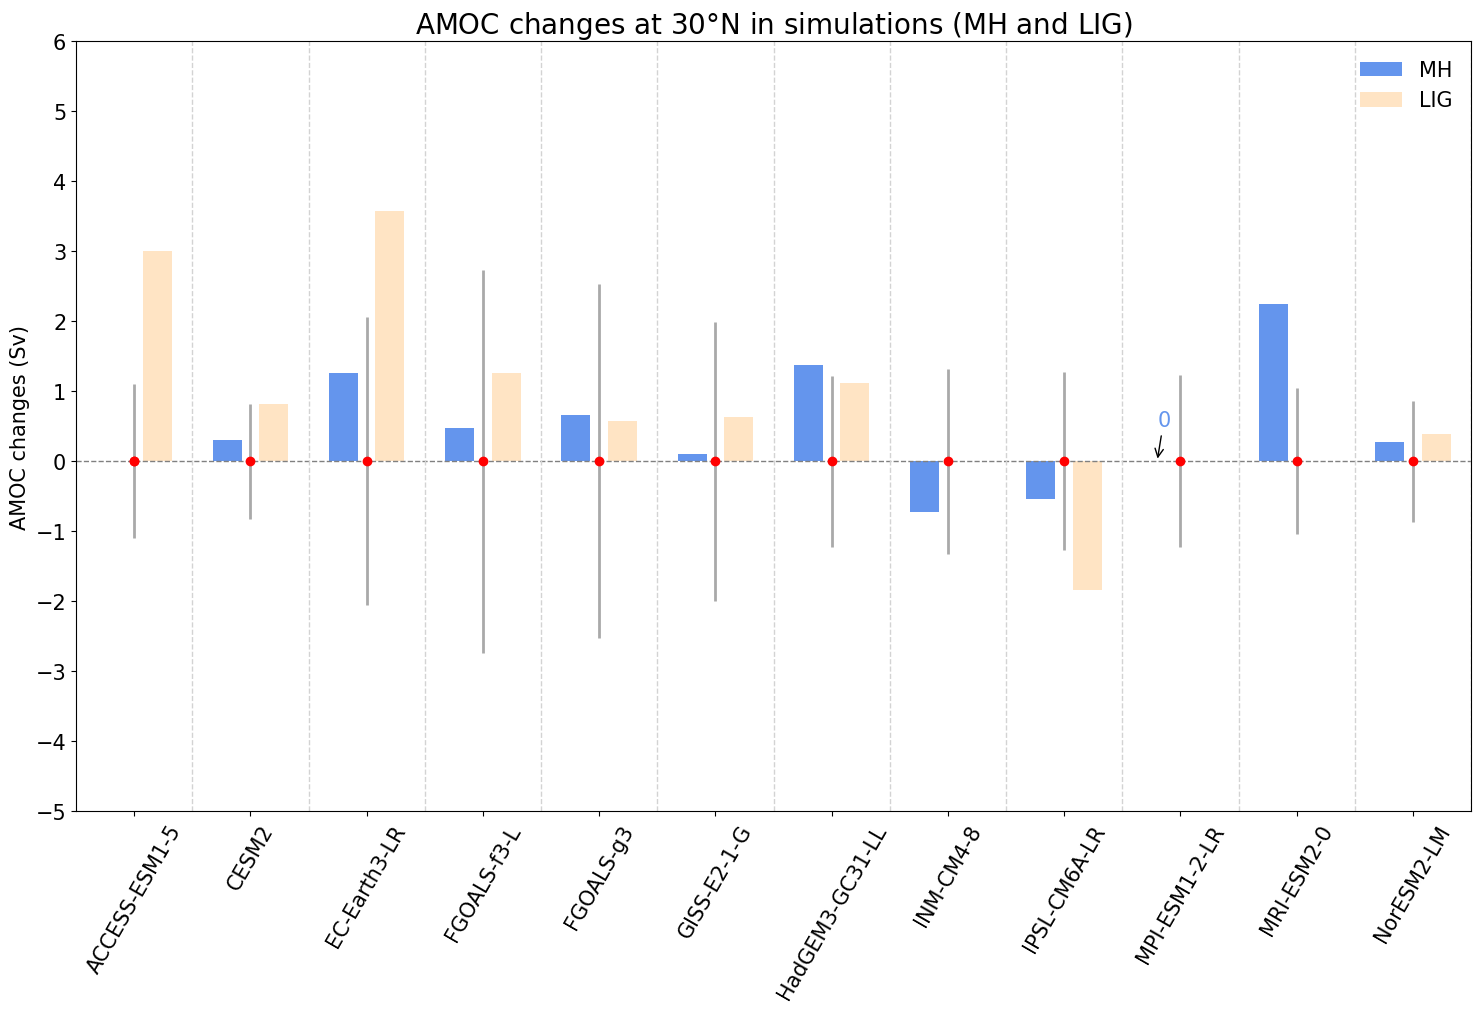

In [133]:
#Generate plotting positions 
p1=[0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3,11.3]
p2=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5]
p3=[0.7,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,9.7,10.7,11.7]
#Generate ref. lines
xlines=[1,2,3,4,5,6,7,8,9,10,11,12]
ylines=[14.9,16.8]


fig=plt.figure(figsize=(18,10)) 
ax=fig.add_subplot(111)
#plt.figure(figsize=(18,10))
plt.ylim((-5,6))
plt.xlim((0,12))
plt.xticks(size = 15)
plt.yticks(size = 15)

ax.bar(0,0,color='cornflowerblue',label='MH')
ax.bar(0,0,color='bisque',label='LIG')
   
plt.errorbar(p2[0],0, yerr=1.1, fmt='o', color='r', ecolor='darkgray', elinewidth=2, capsize=0)

for m in range (0,12):
    plt.bar(p1[m],mh_sv_change[m],width=0.25,color='cornflowerblue')
    plt.bar(p3[m],lig_sv_change[m],width=0.25,color='bisque')
    
    pi_yerr = pi_std[:] 
    plt.errorbar(p2[m], 0, yerr=pi_yerr[m], fmt='o', color='r', ecolor='darkgray', elinewidth=2, capsize=0) 
    
    
plt.annotate('0',xy=(p1[9],0),xytext=(p1[9],0.5),color='cornflowerblue',
                                        arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15)

    
plt.xticks(p2,all_model_name,fontsize=15,rotation=60)
plt.axhline(0,color='grey',linestyle="--",linewidth=1)


leg=plt.legend(edgecolor='None',facecolor='None',fontsize=15,loc='upper right')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
for xi in xlines:
    plt.axvline(xi,color='lightgrey',linestyle="--",linewidth=1)
    
plt.title('AMOC changes at $30\degree$N in simulations (MH and LIG)',fontsize=20)
plt.ylabel('AMOC changes (Sv)',fontsize=15)
ax.yaxis.set_major_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(2.5))


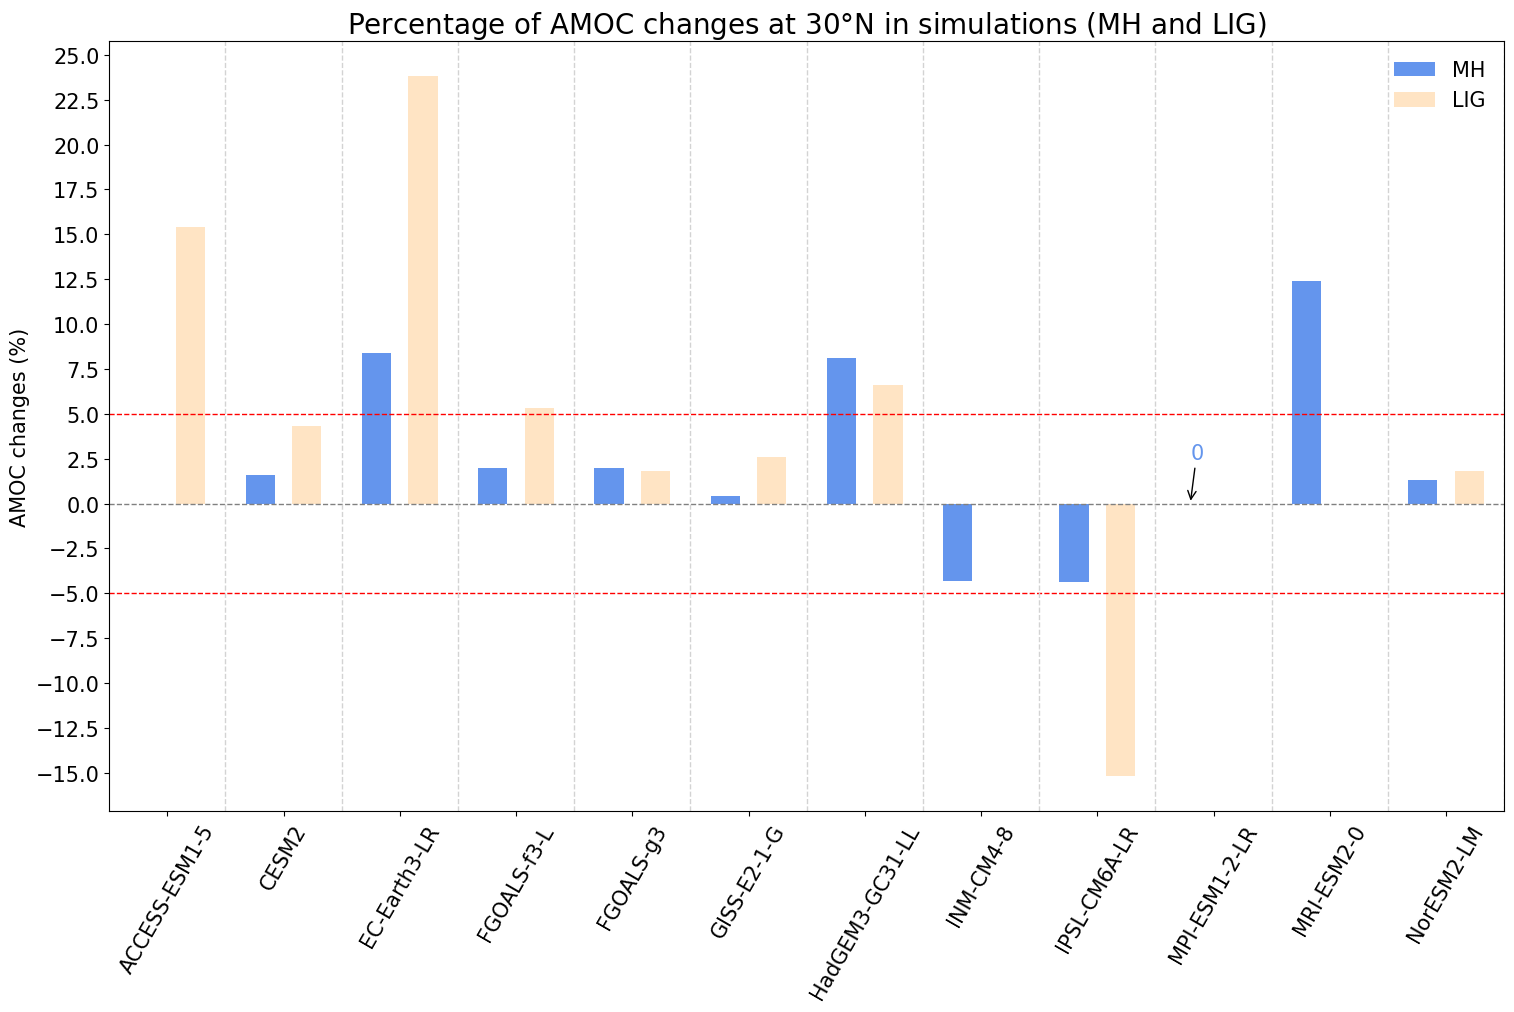

In [134]:
#Generate plotting positions 
p1=[0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3,11.3]
p2=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5]
p3=[0.7,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,9.7,10.7,11.7]
#Generate ref. lines
xlines=[1,2,3,4,5,6,7,8,9,10,11,12]
ylines=[14.9,16.8]


fig=plt.figure(figsize=(18,10)) 
ax=fig.add_subplot(111)
#plt.figure(figsize=(18,10))
#plt.ylim((-5,6))
plt.xlim((0,12))
plt.xticks(size = 15)
plt.yticks(size = 15)

ax.bar(0,0,color='cornflowerblue',label='MH')
ax.bar(0,0,color='bisque',label='LIG')


for m in range (0,12):
    plt.bar(p1[m],mh_per_change[m],width=0.25,color='cornflowerblue')
    plt.bar(p3[m],lig_per_change[m],width=0.25,color='bisque')
    
plt.annotate('0',xy=(p1[9],0),xytext=(p1[9],2.5),color='cornflowerblue',
                                        arrowprops=dict(arrowstyle='->',connectionstyle='arc3'),fontsize=15)
    
plt.xticks(p2,all_model_name,fontsize=15,rotation=60)
plt.axhline(0,color='grey',linestyle="--",linewidth=1)
plt.axhline(5,color='r',linestyle="--",linewidth=1)
plt.axhline(-5,color='r',linestyle="--",linewidth=1)

leg=plt.legend(edgecolor='None',facecolor='None',fontsize=15,loc='upper right')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
for xi in xlines:
    plt.axvline(xi,color='lightgrey',linestyle="--",linewidth=1)
    
plt.title('Percentage of AMOC changes at $30\degree$N in simulations (MH and LIG)',fontsize=20)
plt.ylabel('AMOC changes (%)',fontsize=15)
ax.yaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(2.5))


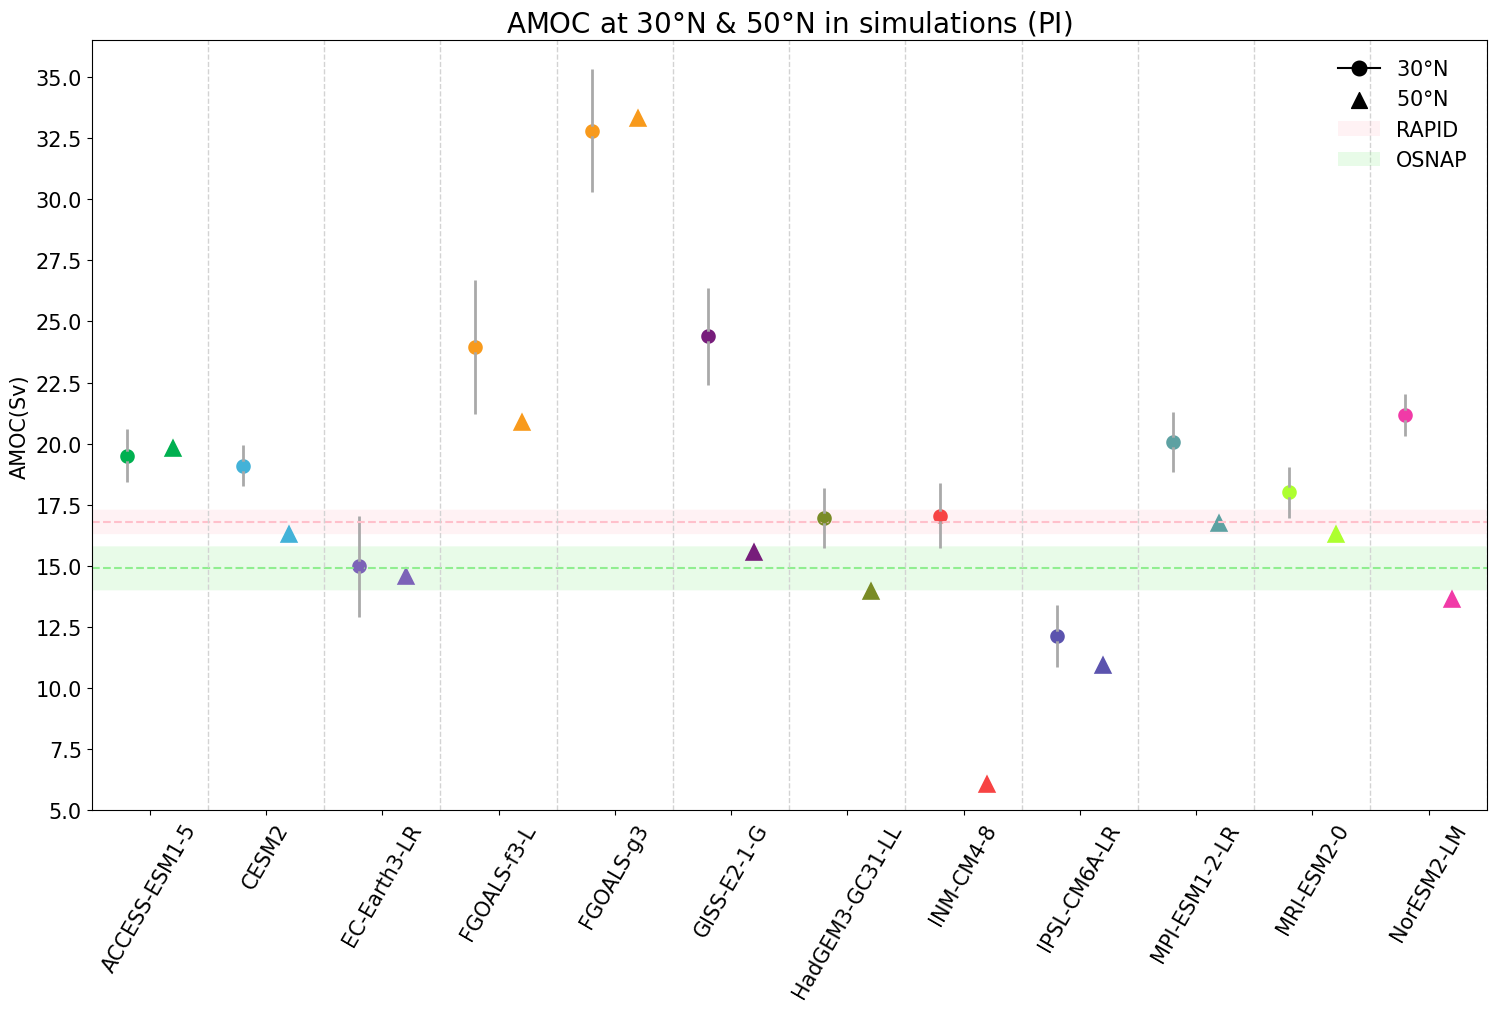

In [135]:
#Generate plotting positions 
p1=[0.3,1.3,2.3,3.3,4.3,5.3,6.3,7.3,8.3,9.3,10.3,11.3]
p2=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5]
p3=[0.7,1.7,2.7,3.7,4.7,5.7,6.7,7.7,8.7,9.7,10.7,11.7]
#Generate ref. lines
xlines=[1,2,3,4,5,6,7,8,9,10,11,12]
ylines=[14.9,16.8]


fig=plt.figure(figsize=(18,10)) 
ax=fig.add_subplot(111)
#plt.figure(figsize=(18,10))
plt.ylim((5,36.5))
plt.xlim((0,12))
plt.xticks(size = 15)
plt.yticks(size = 15)

ax.plot(0,0,color='k',marker='o',label='$30\degree$N',mew=5.5)
ax.scatter(0,0,color='k',marker='^',label='$50\degree$N',s=130)


# plot PI ACCESS 30N 
plt.plot(p1[0],19.515539,marker='o', color=(lig_pmip4_r[0],lig_pmip4_g[0],lig_pmip4_b[0]),fillstyle='full',mew=5.5, ms=5,linestyle='None')
plt.errorbar(p1[0],19.515539, yerr=1.1, fmt='o', color=(lig_pmip4_r[0],lig_pmip4_g[0],lig_pmip4_b[0]), ecolor='darkgray', elinewidth=2, capsize=0) 

# plot PI ACCESS 50N
plt.plot(p3[0],19.755065,marker='^', color=(lig_pmip4_r[0],lig_pmip4_g[0],lig_pmip4_b[0]),fillstyle='full',mew=5.5, ms=5,linestyle='None')

# amoc_pi_30n do not have ACCESS model
# plot rest of models, start from CESM
for m in range (0,len(pmip4_modelname)):
    plt.plot(p1[m+1],amoc_pi_30[m],marker='o', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]),fillstyle='full',mew=5.5, ms=5,linestyle='None') 
    pi_yerr = pi_std[:]   #have ACCESS model
    plt.errorbar(p1[m+1], amoc_pi_30[m], yerr=pi_yerr[m+1], fmt='o', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), ecolor='darkgray', elinewidth=2, capsize=0) 
    
    
    
    
    plt.plot(p3[m+1],amoc_pi_50[m],marker='^', color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]),fillstyle='full',mew=5.5, ms=5,linestyle='None')
    

    
plt.xticks(p2,all_model_name,fontsize=15,rotation=60)


X = np.linspace(0, 12, 1000)
Y1 = 0*X+16.3 #overlap RAPID 16.8+/-0.5
Y2 = 0*X+17.3

Y3 = 0*X+14 #OSNAP:14.9+/-0.9 Sv
Y4 = 0*X+15.8
    
plt.axhline(y=16.8,color='pink',linestyle="--",linewidth=1.5)
plt.fill_between(X,Y1,Y2,facecolor='pink', alpha=0.2, label='RAPID') # define the range for x-axis, then define the range for y-axis (upper & bottom)
plt.axhline(y=14.9,color='lightgreen',linestyle="--",linewidth=1.5)
plt.fill_between(X,Y3,Y4,facecolor='lightgreen', alpha=0.2, label='OSNAP')

leg=plt.legend(edgecolor='None',facecolor='None',fontsize=15,loc='upper right')
for line, text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())
for xi in xlines:
    plt.axvline(xi,color='lightgrey',linestyle="--",linewidth=1)
    
plt.title('AMOC at $30\degree$N & $50\degree$N in simulations (PI)',fontsize=20)
plt.ylabel('AMOC(Sv)',fontsize=15)
ax.yaxis.set_major_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(2.5))
